In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import NN as nn
from IPython.display import display, clear_output
from sklearn import metrics

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.npz")
(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

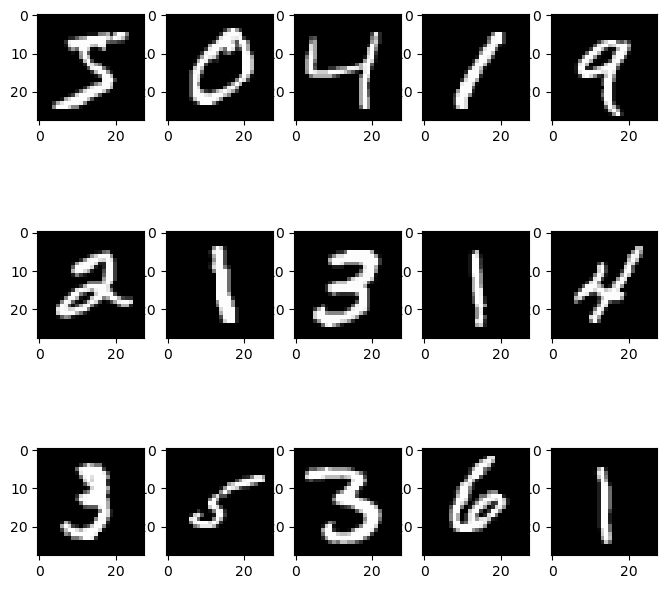

In [3]:
fig, axs = plt.subplots(3, 5, figsize=(8, 8))
img_index = 0
for i in range(3):
    for j in range(5):
        axs[i, j].imshow(x_train[img_index], cmap='gray')
        img_index += 1

In [4]:
# Normalizing the data
x_train = x_train / 255.
x_test = x_test / 255.

In [12]:
num_features = 28 * 28
num_labels = 10
layers = [
    nn.DenseLayer(num_features, 0, nn.dummy_activation, nn.dummy_activation, is_input= True, is_output= False),
    nn.DenseLayer(256, num_features, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(256, 256, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(64, 256, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(32, 64, nn.sigmoid, nn.sigmoid_prime),
    nn.DenseLayer(num_labels, 32, nn.sigmoid, nn.sigmoid_prime, is_input = False, is_output= True)
]
learning_rate = 0.01
lamda = 0.03
epochs = 150

In [13]:
# Reshaping the data to m, num_features
x_train = np.reshape(x_train, (-1, num_features))
y_train = np.reshape(y_train, (-1, 1))

x_test = np.reshape(x_test, (-1, num_features))
y_test = np.reshape(y_test, (-1, 1))

(x_train.shape, y_train.shape), (x_test.shape, y_test.shape)

(((60000, 784), (60000, 1)), ((10000, 784), (10000, 1)))

In [14]:
history = nn.train(layers, 
            x_train, 
            y_train, 
            num_labels,
            epochs,
            learning_rate,
            lamda,
            x_test,
            y_test,
            False,
            lambda x: display(x),
            lambda: clear_output(wait= True)
            )

'Epoch: 149 -> Loss: 3.27'

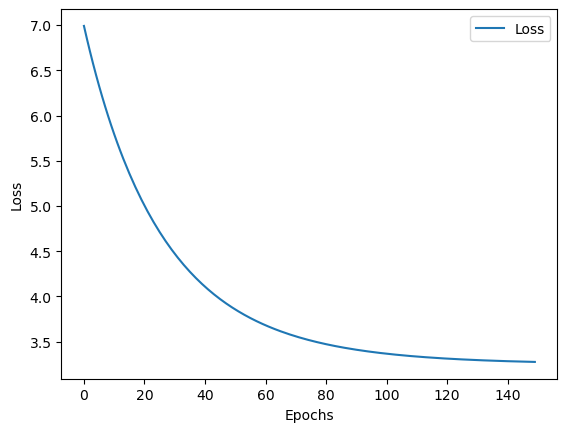

In [15]:
plt.plot(history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Loss'])

(60000, 10) (60000, 1)


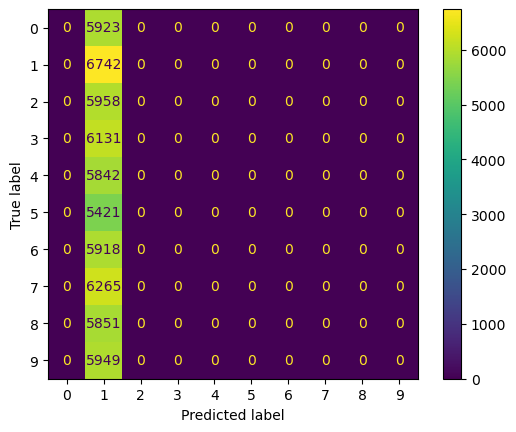

In [18]:
raw_predictions = nn.forward_propagate(layers, x_train)
predictions = np.argmax(raw_predictions, 1)
actual = y_train
print(raw_predictions.shape, actual.shape)
confusion_matrix = metrics.confusion_matrix(actual, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()